### Vorraussetzungen

Zum speichern und auslesen von Audiodateien ist die vorinstallierte Python Bibiliothek 'wave' sehr hilfreich.
Zum generieren und analysieren der Audiodateien empfehle ich 'numpy', da sie schneller ist als die eingebaute 'math' Bibiliothek und einiges einfacher macht.

Außerdem ist 'Audacity' wahrscheinlich sehr praktisch um sich das generierte Audio anzuhören und zu analysieren.
Aber natürlich kannst du auch einen anderen Weg wählen.

Als ersten Schritt kannst du überlegen:
- wie du eine Audiodatei einliest und direkt wieder abspeicherst
- einen Ton mit numpy generierst und abspeicherst (lies dazu erst den Absatz unten)
- was passiert wenn du die frame_rate verdoppelst

**Kleiner Hinweis: In der wave Bibiliothek sind frame rate und sample rate dasselbe, das ist manchmal etwas verwirrend**

### Morsecde
Der erste Schritte für das 'instantane' übertragen von Informationen war das Morsen. Dafür müssen wir Text in [Morse Code](https://de.wikipedia.org/wiki/Morsecode) umwandeln und diesen Code wiederum in eine Audiodatei. Dabei gelten die folgenden Regeln: Es gibt Dit (▄) Dah (▄▄▄):

Die Länge eines Dit bestimmt die Geschwindigkeit, mit der gesendet werden kann. Sie ist die grundlegende Zeiteinheit, auf die alle anderen Zeiten zurückgeführt werden:

Ein Dah hat eine Länge von 3 Dit.
Die Länge der Pause beträgt:
   - 1 Dit zwischen zwei gesendeten Symbolen,
   - 3 Dit zwischen Buchstaben in einem Wort sowie
   - 7 Dit zwischen Wörtern.

Wir unterscheiden also nur zwischen Ton 'an' und Ton 'aus'. Ein gegeigneter Ton wäre bspw. eine Sinus Welle mit 440 Hz (ein mittleres A).
Um zwischen Morse Code und Buchstaben übersetzen zu können verwenden wir das folgende Alphabet:
| Buchstabe | Code |
|--- | --- |
|A |	▄ ▄▄▄ |
|B 	|▄▄▄ ▄ ▄ ▄ |
|C 	|▄▄▄ ▄ ▄▄▄ ▄ |
|D 	|▄▄▄ ▄ ▄ |
|E 	|▄ |
|F 	|▄ ▄ ▄▄▄ ▄ |
|G 	|▄▄▄ ▄▄▄ ▄ |
|H 	|▄ ▄ ▄ ▄ |
|I 	|▄ ▄ |
|J 	|▄ ▄▄▄ ▄▄▄ ▄▄▄ | 
|K 	|▄▄▄ ▄ ▄▄▄ |
|L 	|▄ ▄▄▄ ▄ ▄ |
|M 	|▄▄▄ ▄▄▄ |
|N 	|▄▄▄ ▄ |
|O 	|▄▄▄ ▄▄▄ ▄▄▄ |
|P 	|▄ ▄▄▄ ▄▄▄ ▄ |
|Q 	|▄▄▄ ▄▄▄ ▄ ▄▄▄ | 
|R 	|▄ ▄▄▄ ▄ |
|S 	|▄ ▄ ▄ |
|T 	|▄▄▄ |
|U 	|▄ ▄ ▄▄▄ |
|V 	|▄ ▄ ▄ ▄▄▄ |
|W 	|▄ ▄▄▄ ▄▄▄ |
|X 	|▄▄▄ ▄ ▄ ▄▄▄ |
|Y 	|▄▄▄ ▄ ▄▄▄ ▄▄▄| 
|Z 	|▄▄▄ ▄▄▄ ▄ ▄ |

#### Morseencoder
Schreibe eine Funktion die aus einem Text Morse kodiertes Audio generiert.

Denke darüber nach, wie du das Ergebnis visualisieren kannst.

In [1]:
import wave
import numpy as np

#### Morsedecoder
Als nächstes wollen wir unseren Ton wieder zu Text dekodieren. Dafür müssen wir zwischen verschieden langen Stille und Ton Perioden unterscheiden und die Regeln von oben umgekehrt anwenden

### Mehrfrequenzwahlverfahren
Ein etwas komplizierteres Verfahren das dafür aber mehr Information (also bspw. bits) pro Zeit übertragen kann ist das [Mehrfrequenzwahlverfahren](https://de.wikipedia.org/wiki/Mehrfrequenzwahlverfahren) was früher zur Übertragung von Steuersignalen (wie bspw. die anzurufende Telefonnummer) mit analogen Telefonleitungen genutzt wurde. Dabei wird ein Symbol immer durch die Überlagerung von zwei Tönen kodiert:

| Frequenz | 	1209 Hz 	|1336 Hz 	|1477 Hz| 	1633 Hz|
| --- | --- | --- | --- | --- |
|697 Hz| 	1| 	2| 	3| 	A|
|770 Hz| 	4 |	5 |	6| 	B|
|852 Hz| 	7 	|8 	|9 |	C|
|941 Hz| 	* |	0 |	# 	|D |

Ab einer Stille von 10 ms wird angenommen das der nächste Ton ein neues Symbol darstellt (wichtig wenn zweimal dasselbe Symbol hintereinander gewählt wird).

Beispiel einer überlagerten Frequenz:
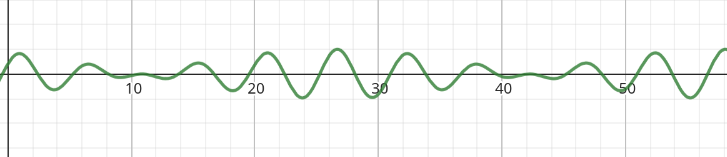

Schreibe eine Funktion die nach der Tabelle oben Symbole in Ton kodiert (bspw. eine Telefonnummer)

Denke darüber nach, wie du das Ergebnis visualisieren kannst.

#### Telefondekodierer
Das dekodieren ist ein gutes Stück schwieriger, wir müssen nämlich überlegen, wie wir die verschiedenen Frequenzen unterscheiden können.
Dabei ist es praktisch zu schauen wie stark zwei gegebene Listen (oder Audiosignale) korrelieren, also wie stark sie sich ähnlich verhalten. Dabei sollte der absolute Wert der Korrelation umso weiter absolut größer sein je stärker die Signale korrelieren (also umso weiter positiv oder negativ von der 0 entfernt sein).

Konkret wollen wir eine Korrelation die relativ unempfindlich ist gegenüber Amplituden und Phasenverschiebung, aber sehr empfindlich gegenüber Frequenzunterschieden.

#### Große Korrelation:
| Amplitudenunterschied | Phasenverschiebung|
| --- | --- |
| 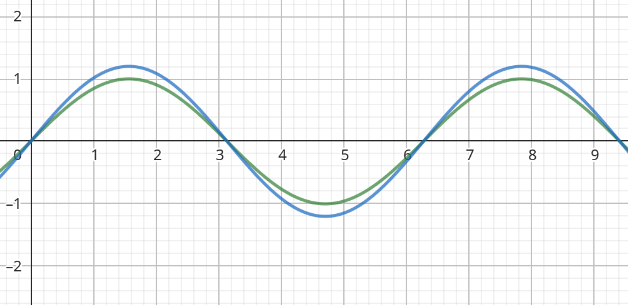 | 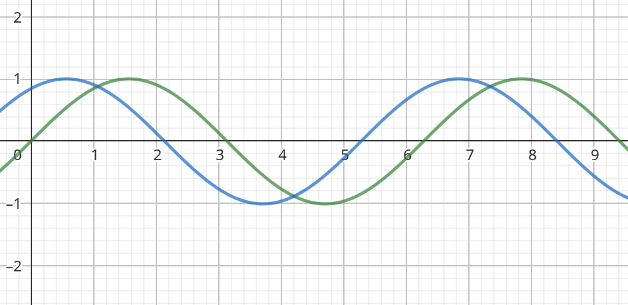|

#### Geringe Korrelation:
| Frequenzunterschied | zufällige Signale |
| --- | ---|
|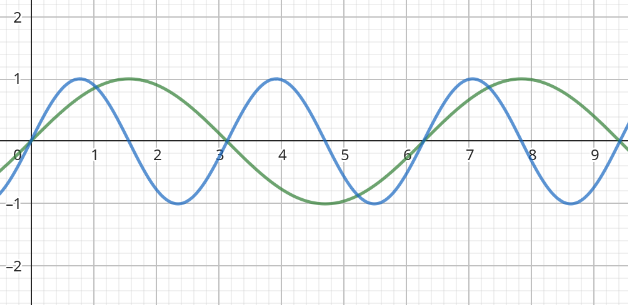 | 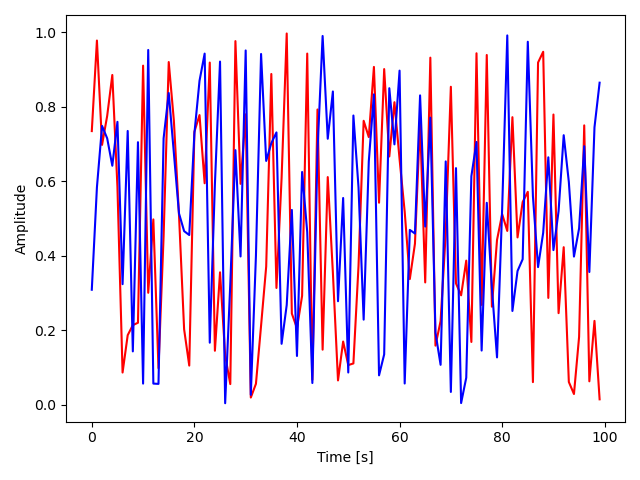|

Schreibe eine Funktion die gegeben zwei Listen die bei den ersten beiden Beispielen große Zahlen ausgibt und bei den letzten beiden kleine, sowie eine Funktion die gegeben ein Audiosignal, dessen frame rate und eine Vergleichsfrequenz die Korrelation (basierend auf deiner Funktion) zwischen dem gegebenen Audiosignal und der Frequenz berechnet.

Schreibe mit diesen Funktionen einen Decoder für das Mehrfrequenzwahlverfahren

In Deutschland ist das Faxgerät ja immer noch weitverbreitet, zwar ist der Fax Standard selbst relativ kompliziert, aber wie könnte man basierend auf den bisherigen Ansätzen Bilder verschicken? Zum einlesen von Bildern kannst du entweder die 'Pillow' Bibiliothek nutzen oder das Bildformat [Pixelmap](https://de.wikipedia.org/wiki/Portable_Anymap).